In [2]:
import numpy as np
import pandas as pd
import Mongo_Connector as mongo
import tlsh
from icecream import ic
import matplotlib.pyplot as plt
import ssdeep
import warnings
from concurrent.futures import ThreadPoolExecutor
from itertools import combinations
import concurrent.futures
warnings.filterwarnings('ignore')
db = mongo.init("portainer", port=32768)
df = pd.DataFrame(list(db["malware"].find({})))

Text(0.5, 1.0, 'Distribution of families')

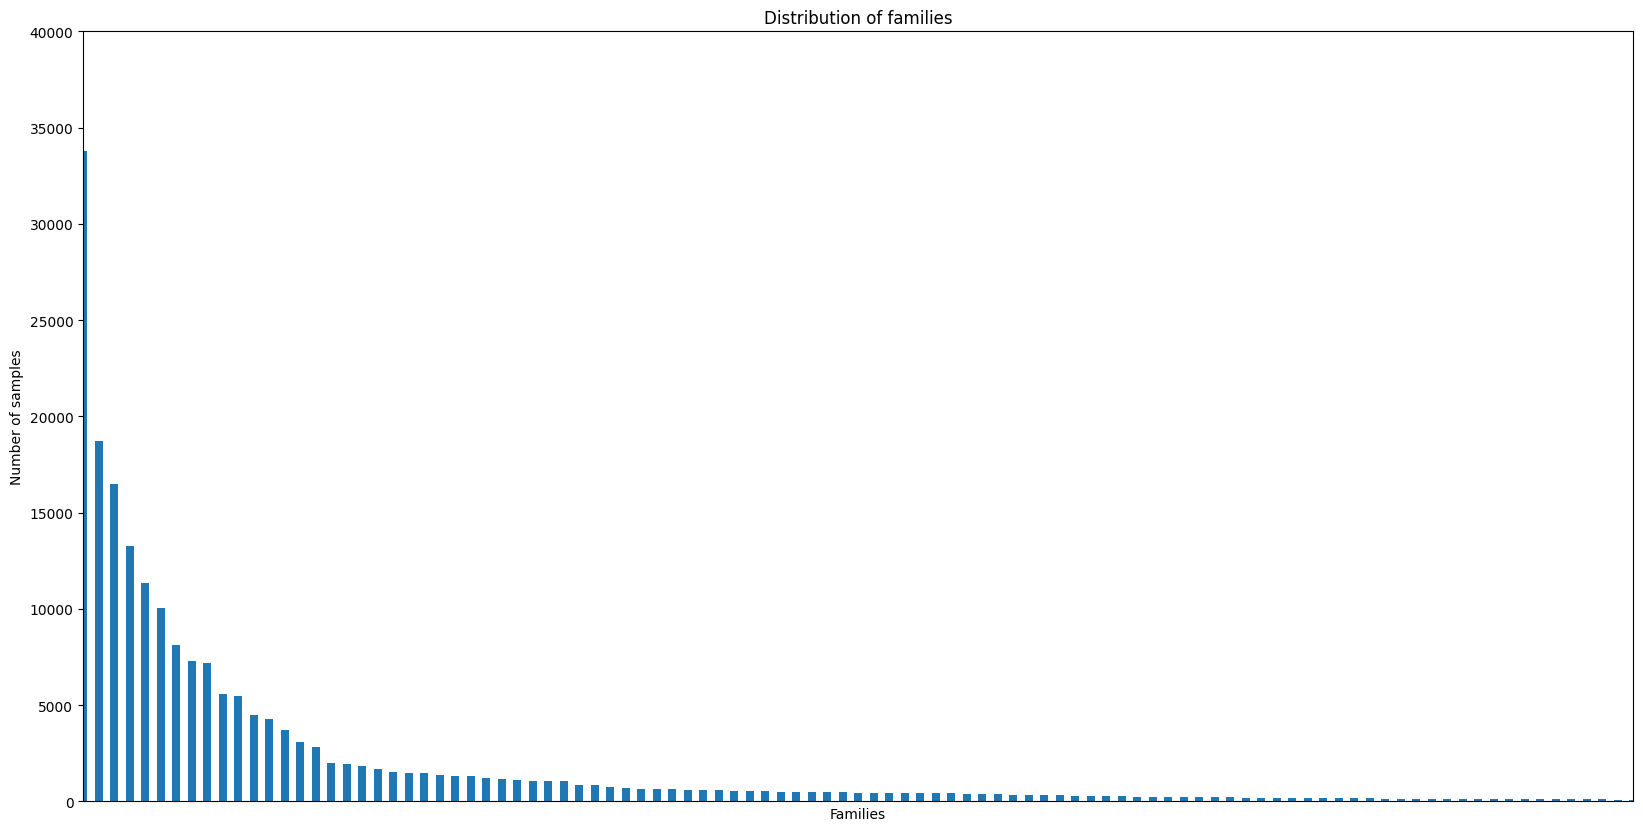

In [3]:
family_counts = df['family'].value_counts()

# Filter the families with more than one entry
scicore_filtered = df[df['family'].map(family_counts) > 1]
family_counts.plot(kind='bar', figsize=(20, 10))
plt.xticks([])
plt.ylim(0, 40000)
plt.xlim(0,100)
plt.ylabel('Number of samples')
plt.xlabel('Families')
plt.title('Distribution of families')
#plt.rcParams.update({'font.size': 22})

In [4]:
df

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke
0,6563776f3624482ac9d197e3,9002Rat,006c74c6813a6efeabea860b2718ed548eed216a319d76...,66888,{'ssdeep': '1536:fyOinfXrmThthYvYh+8+IXbTyllRb...,sdhash hash,{'tlsh': 'T18A635B27E9548473CDC24DB044E80B7B8A...,Machoc hash,{'strings': 'T1E212E7DB1104D5268DC716B2880B19E...,{'machoke': '526cb6c74b6b4fe4ab698f6a149c2da4a...
1,6563776f3624482ac9d197e4,9002Rat,0414ffdf9dcf32061cc57d0b54bf4410c1c588258c1261...,91136,{'ssdeep': '1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6...,sdhash hash,{'tlsh': 'T1D9937B107682C275D47A29344C69CB731B...,Machoc hash,{'strings': 'T153E14A15A8F899E35597838855607B8...,{'machoke': 'c21014d561f4751fdaa6af077e8d16e1a...
2,6563776f3624482ac9d197e5,9002Rat,054ac444bb2e4fa836ecb6ecdbb9381001ab26cf109451...,20008392,{'ssdeep': '393216:1ZZNprQxrpbXZRCb0g/6cGx3PjW...,sdhash hash,{'tlsh': 'T14217331276D2C037C1A711719A37EB29AA...,Machoc hash,{'strings': 'T1865523536490B4B9B1EB478206F3A75...,"{'machoke': 'MNULL', 'hash_time': 0}"
3,6563776f3624482ac9d197e6,9002Rat,06fb64ebe50ee96901a339a7c5f686ead86e2ed6b26a73...,13189815,{'ssdeep': '393216:z0ZCif89tnKfsp09SskycXZBBLW...,sdhash hash,{'tlsh': 'T192D6336519E01E8CF2D177765AB1A2D44F...,Machoc hash,{'strings': 'T1401533932CF134146066EBB64D4FBCA...,{'machoke': 'fc420b141a25c1e87bff906654371d173...
4,6563776f3624482ac9d197e7,9002Rat,07da10375b0862760f3cb84e563f74ff4fc53864e34836...,21415252,{'ssdeep': '393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO...,sdhash hash,{'tlsh': 'T16827339FB8735437E78CE4F089FA77F202...,Machoc hash,{'strings': 'T107653373A5E073D133E792E3A6CBEB5...,{'machoke': '9afe7f481a25c1e87bff906697df084cc...
...,...,...,...,...,...,...,...,...,...,...
208641,658f24555f823237b2e23b36,zxShell,fbe294910ef833e1c9b2c8663c06b6ef99c13b2bc5eb01...,1698208,NaN,NaN,NaN,NaN,{'strings': 'T173F301867C0624D5EBFFAEDB4D3A703...,NaN
208642,658f24555f823237b2e23b37,zxShell,fc3cacb2103adedc11720c34a243de58085c1a7283ba35...,204240,NaN,NaN,NaN,NaN,{'strings': 'T1BF62AFC75196B9D08B8A8F92E752A05...,NaN
208643,658f24555f823237b2e23b38,zxShell,dbd03093e58c2d60f4f47b720691cd3e6310f0566403ee...,1343952,NaN,NaN,NaN,NaN,{'strings': 'T1425302C618D220E6EF92DA1C95AB778...,NaN
208644,658f24555f823237b2e23b39,zxShell,e2d2761fc2535d99527df2f7cffd8dddccd504dc0096f6...,1181088,NaN,NaN,NaN,NaN,{'strings': 'T167B3E1E1659228B103A6CF4D5AE7770...,NaN


In [5]:
original_count = df.shape[0]

# Count the occurrences of each family
family_counts = df['family'].value_counts()

# Filter the DataFrame to keep families with more than one entry
malware_filtered = df[df['family'].map(family_counts) > 1]
family_counts = malware_filtered['family'].value_counts()
# Get the new number of rows after filtering
filtered_count = malware_filtered.shape[0]

# Identify the families that were removed
removed_families = family_counts[family_counts == 1].index.tolist()

# Print the results
print(f"Original DataFrame had {original_count} rows.")
print(f"Filtered DataFrame has {filtered_count} rows.")
print(f"Amount of families: {len(family_counts)}")
print(f"Families removed (only had 1 entry): {removed_families}")

Original DataFrame had 208646 rows.
Filtered DataFrame has 208644 rows.
Amount of families: 525
Families removed (only had 1 entry): []


In [6]:
# reduce the size every family by a factor of 10 randomly chosen, meaning take 10% of each family

namber = 30
bigger_than_5 = df[df['family'].map(family_counts) > namber]
smaller_than_5 = df[df['family'].map(family_counts) <= namber]
# smaple randomly 5 from each family
sampled = bigger_than_5.groupby('family').apply(lambda x: x.sample(namber))

# concat the two dataframes
sampled = pd.concat([sampled, smaller_than_5])

sampled = sampled.reset_index(drop=True)



([], [])

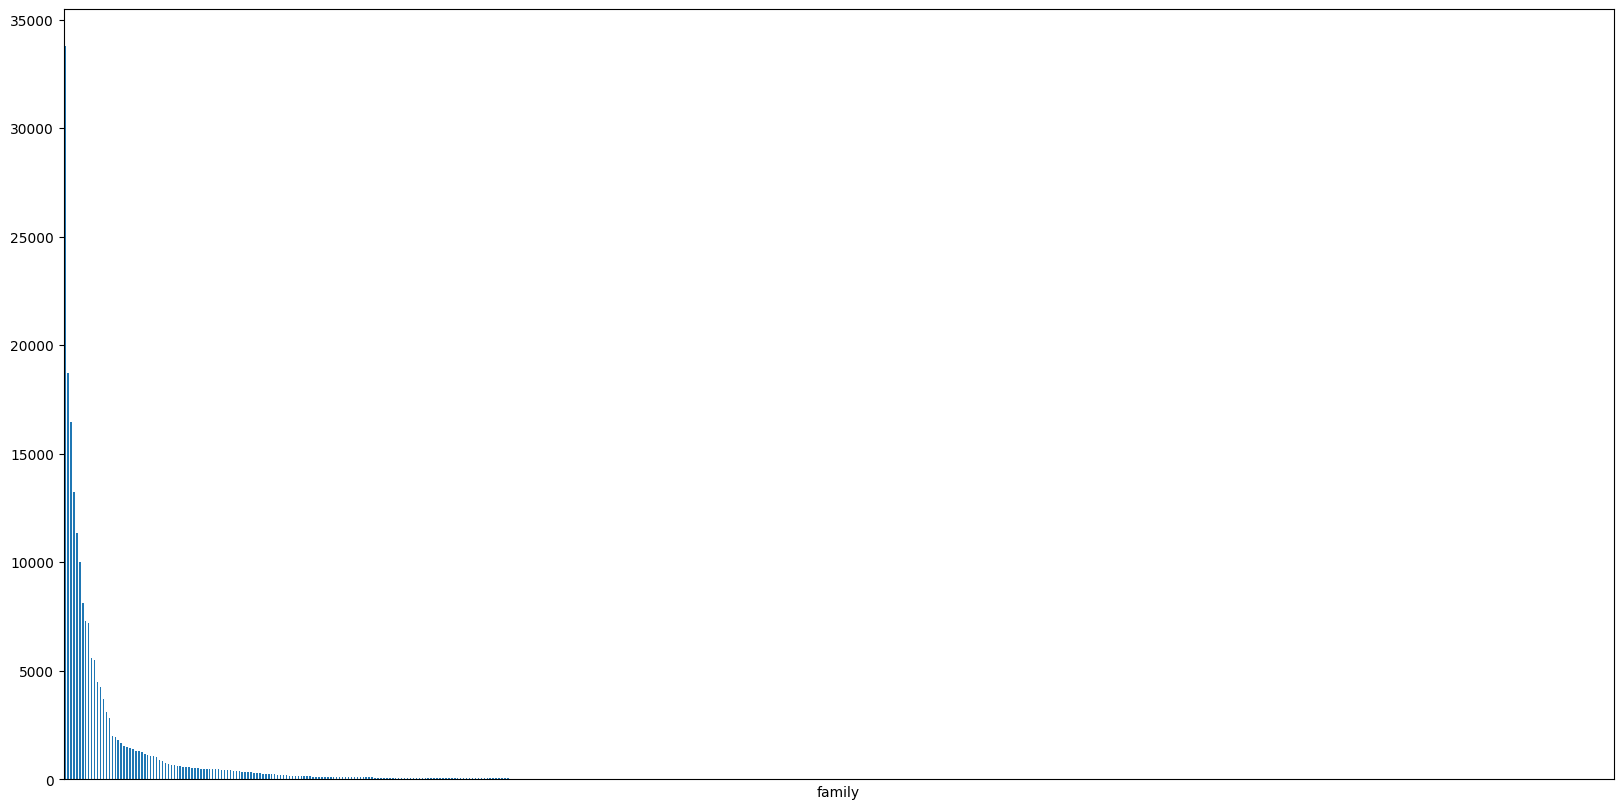

In [7]:
malware_filtered["family"].value_counts().plot(x="family", y="count", kind="bar", figsize=(20, 10))
plt.xticks([])

In [64]:
len(df["family"].unique())

527

In [8]:
malware_filtered["scicore"] = False
sampled["scicore"] = False
size = sampled.shape[0] / 20
scicore = pd.DataFrame(list(db["scicore"].aggregate([{"$sample": {"size": size}}])))
scicore["scicore"] = True

malware_concat = pd.concat([malware_filtered, scicore])

malware_concat

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke,scicore
0,6563776f3624482ac9d197e3,9002Rat,006c74c6813a6efeabea860b2718ed548eed216a319d76...,66888,{'ssdeep': '1536:fyOinfXrmThthYvYh+8+IXbTyllRb...,sdhash hash,{'tlsh': 'T18A635B27E9548473CDC24DB044E80B7B8A...,Machoc hash,{'strings': 'T1E212E7DB1104D5268DC716B2880B19E...,{'machoke': '526cb6c74b6b4fe4ab698f6a149c2da4a...,False
1,6563776f3624482ac9d197e4,9002Rat,0414ffdf9dcf32061cc57d0b54bf4410c1c588258c1261...,91136,{'ssdeep': '1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6...,sdhash hash,{'tlsh': 'T1D9937B107682C275D47A29344C69CB731B...,Machoc hash,{'strings': 'T153E14A15A8F899E35597838855607B8...,{'machoke': 'c21014d561f4751fdaa6af077e8d16e1a...,False
2,6563776f3624482ac9d197e5,9002Rat,054ac444bb2e4fa836ecb6ecdbb9381001ab26cf109451...,20008392,{'ssdeep': '393216:1ZZNprQxrpbXZRCb0g/6cGx3PjW...,sdhash hash,{'tlsh': 'T14217331276D2C037C1A711719A37EB29AA...,Machoc hash,{'strings': 'T1865523536490B4B9B1EB478206F3A75...,"{'machoke': 'MNULL', 'hash_time': 0}",False
3,6563776f3624482ac9d197e6,9002Rat,06fb64ebe50ee96901a339a7c5f686ead86e2ed6b26a73...,13189815,{'ssdeep': '393216:z0ZCif89tnKfsp09SskycXZBBLW...,sdhash hash,{'tlsh': 'T192D6336519E01E8CF2D177765AB1A2D44F...,Machoc hash,{'strings': 'T1401533932CF134146066EBB64D4FBCA...,{'machoke': 'fc420b141a25c1e87bff906654371d173...,False
4,6563776f3624482ac9d197e7,9002Rat,07da10375b0862760f3cb84e563f74ff4fc53864e34836...,21415252,{'ssdeep': '393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO...,sdhash hash,{'tlsh': 'T16827339FB8735437E78CE4F089FA77F202...,Machoc hash,{'strings': 'T107653373A5E073D133E792E3A6CBEB5...,{'machoke': '9afe7f481a25c1e87bff906697df084cc...,False
...,...,...,...,...,...,...,...,...,...,...,...
410,950,OTF2,884bb6ff50649503c4b681bd835894df9b6cc0b26e2b7c...,764638,{'ssdeep': '12288:xKFOthDBGmDMoE5T2OiOubTQC5SZ...,sdhash hash,{'tlsh': 'T1F3F43BCA3369642EC5D6C13482038BF3E4...,Machoc hash,{'strings': 'T152F37349095C2A3B8DE64FE1D3846E8...,NaN,True
411,1460,BLAST+,6047d95d9837fb7996370661e7043c1b941f1d3e586b87...,18108120,{'ssdeep': '196608:dx/j4a+dSVbc+tkZ/WpjQGsgWnR...,sdhash hash,{'tlsh': 'T164077C17EA926C9DC4DED574425F8A72AF...,Machoc hash,{'strings': 'T18D36F9F58DD4B986DDAF6384521F5A1...,NaN,True
412,1604,Chiron,d29c5ec81e7d6113f7c18a622c7145f7ac2425c44abffb...,330,{'ssdeep': '6:B5SKL+I0VcehtKX+rZTGQiFtXF3ZHoAo...,sdhash hash,{'tlsh': 'T195E026524CA0DB6132A153CA7A31105910...,Machoc hash,{'strings': 'T114E026524CA0DB6032A253CA7A31105...,NaN,True
413,1832,Beast2,c70e91c02baab70f7e5d3641a9e2f1a6a0f3a01febfd70...,1622,{'ssdeep': '48:5xbNEvZYzfnQI7GBNl2S22EftT684Cd...,sdhash hash,{'tlsh': 'T1833142E1F2412FE121F029814A89F28892...,Machoc hash,{'strings': 'T1093153A1F1512FE111F029418A49F68...,NaN,True


In [66]:
a = malware_concat
a = a[a['tlsh'] != 'TNULL']
a.dropna(subset=['tlsh'], inplace=True)
a.dropna(subset=['ssdeep'], inplace=True)
a.dropna(subset=['strings'], inplace=True)
a[a["SHA256"] == "0000015bf5f766e7a709983fe08a8d6983fb5d49213d4389871c2b69e6c19b25"]



,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke,scicore
54788,65638d463624482ac9d26de7,Koadic,0000015bf5f766e7a709983fe08a8d6983fb5d49213d43...,138752,{'ssdeep': '3072:3U/9+vstGGGFOn+tdHhVfErWGQ+SB...,sdhash hash,{'tlsh': 'T1BAD3AE4376C25372E5C116B101A529BBEB...,Machoc hash,{'strings': 'T1A9421C8B18DA396AE1370522C6FCA18...,NaN,False


In [67]:
a = a[a['tlsh'] != 'TNULL']
(a["tlsh"] == "TNULL").sum()

0

In [68]:

a['tlsh'] = a['tlsh'].apply(lambda x: x['tlsh'] if 'tlsh' in x and isinstance(x, dict) else x)
a = a[a['tlsh'] != 'TNULL']
a['ssdeep'] = a['ssdeep'].apply(lambda x: x['ssdeep'] if 'ssdeep' in x and isinstance(x, dict) else x)

a['strings'] = a['strings'].apply(lambda x: x['strings'] if 'strings' in x and isinstance(x, dict) else x)
a = a[a['strings'] != 'TNULL']
filtered_df = a

In [69]:
(filtered_df["tlsh"] == "TNULL").sum()

0

In [70]:
"""def calculate_metrics(values, function):
    if not values:
        return np.nan, np.nan, np.nan, 0

    results = [function(a, b) for a, b in itertools.combinations(values, 2)]
    return np.mean(results), np.median(results), np.std(results), len(results)

def process_group(group):
    family = group['family'].iloc[0]
    tlsh_values = group['tlsh'].tolist()
    ssdeep_values = group['ssdeep'].tolist()
    strings_values = group['strings'].tolist()

    tlsh_mean, tlsh_median, tlsh_std, tlsh_amount = calculate_metrics(tlsh_values, tlsh.diff)
    ssdeep_mean, ssdeep_median, ssdeep_std, ssdeep_amount = calculate_metrics(ssdeep_values, ssdeep.compare)
    strings_mean, strings_median, strings_std, strings_amount = calculate_metrics(strings_values, tlsh.diff)

    return {
        'family': family,
        'tlsh': {'mean': tlsh_mean, 'median': tlsh_median, 'std': tlsh_std, 'amount': tlsh_amount},
        'ssdeep': {'mean': ssdeep_mean, 'median': ssdeep_median, 'std': ssdeep_std, 'amount': ssdeep_amount},
        'strings': {'mean': strings_mean, 'median': strings_median, 'std': strings_std, 'amount': strings_amount}
    }
"""
"""with ThreadPoolExecutor() as executor:
    results = list(executor.map(process_group, [group for _, group in filtered_df.groupby('family')]))

# Transform results into DataFrames
fam_tlsh = pd.DataFrame([{'family': res['family'], **res['tlsh']} for res in results])
fam_ssdeep = pd.DataFrame([{'family': res['family'], **res['ssdeep']} for res in results])
fam_strings = pd.DataFrame([{'family': res['family'], **res['strings']} for res in results])"""
"""
import itertools
# Pre-calculate combinations for both tlsh and ssdeep

# Assuming filtered_df, tlsh, ssdeep are defined elsewhere

# Initialize lists to store data for DataFrame creation
tlsh_data = []
ssdeep_data = []
strings_data = []

for family, group in filtered_df.groupby('family'):
    # Extract the values for tlsh and ssdeep
    tlsh_values = group['tlsh'].tolist()
    ssdeep_values = group['ssdeep'].tolist()
    strings_values = group['strings'].tolist()

    # Calculate combinations and their respective differences/similarities
    tlsh_combinations = itertools.combinations(tlsh_values, 2)
    ssdeep_combinations = itertools.combinations(ssdeep_values, 2)
    strings_combinations = itertools.combinations(strings_values, 2)
    

    tlsh_diffs = [tlsh.diff(a, b) for a, b in tlsh_combinations]
    ssdeep_scores = [ssdeep.compare(a, b) for a, b in ssdeep_combinations]
    strings_diffs = [tlsh.diff(a, b) for a, b in strings_combinations]
    

    # Append the results to the lists
    tlsh_data.append({
        'family': family,
        'values': tlsh_diffs,
        'mean': np.mean(tlsh_diffs) if tlsh_diffs else np.nan,
        'median': np.median(tlsh_diffs) if tlsh_diffs else np.nan,
        'std': np.std(tlsh_diffs) if tlsh_diffs else np.nan,
        'amount': len(tlsh_diffs)
    })

    ssdeep_data.append({
        'family': family,
        'values': ssdeep_scores,
        'mean': np.mean(ssdeep_scores) if ssdeep_scores else np.nan,
        'median': np.median(ssdeep_scores) if ssdeep_scores else np.nan,
        'std': np.std(ssdeep_scores) if ssdeep_scores else np.nan,
        'amount': len(ssdeep_scores)
    })
    
    strings_data.append({
        'family': family,
        'values': strings_diffs,
        'mean': np.mean(strings_diffs) if strings_diffs else np.nan,
        'median': np.median(strings_diffs) if strings_diffs else np.nan,
        'std': np.std(strings_diffs) if strings_diffs else np.nan,
        'amount': len(strings_diffs)
    })

# Create DataFrames from the lists
fam_tlsh = pd.DataFrame(tlsh_data)
fam_ssdeep = pd.DataFrame(ssdeep_data)
fam_strings = pd.DataFrame(strings_data)
fam_tlsh = fam_tlsh[fam_tlsh['amount'] > 1]
fam_tlsh[["mean","median","std"]].boxplot()
fam_ssdeep = fam_ssdeep[fam_ssdeep['amount'] > 1]
fam_ssdeep[["mean","median","std"]].boxplot()
fam_strings = fam_strings[fam_strings['amount'] > 1]
fam_strings[["mean","median","std"]].boxplot()"""

'\nimport itertools\n# Pre-calculate combinations for both tlsh and ssdeep\n\n# Assuming filtered_df, tlsh, ssdeep are defined elsewhere\n\n# Initialize lists to store data for DataFrame creation\ntlsh_data = []\nssdeep_data = []\nstrings_data = []\n\nfor family, group in filtered_df.groupby(\'family\'):\n    # Extract the values for tlsh and ssdeep\n    tlsh_values = group[\'tlsh\'].tolist()\n    ssdeep_values = group[\'ssdeep\'].tolist()\n    strings_values = group[\'strings\'].tolist()\n\n    # Calculate combinations and their respective differences/similarities\n    tlsh_combinations = itertools.combinations(tlsh_values, 2)\n    ssdeep_combinations = itertools.combinations(ssdeep_values, 2)\n    strings_combinations = itertools.combinations(strings_values, 2)\n    \n\n    tlsh_diffs = [tlsh.diff(a, b) for a, b in tlsh_combinations]\n    ssdeep_scores = [ssdeep.compare(a, b) for a, b in ssdeep_combinations]\n    strings_diffs = [tlsh.diff(a, b) for a, b in strings_combinations]\n   

In [9]:
# load a csv from a path into the variable tlsh_best
tlsh_best = pd.read_csv("../miniHPC/tlsh_results.csv")
strings_best = pd.read_csv("../miniHPC/strings_results.csv")
ssdeep_best = pd.read_csv("../miniHPC/ssdeep_results.csv")
# drop all entries where the score is 0
tlsh_best = tlsh_best[tlsh_best["Diff Score"] != 0]
strings_best = strings_best[strings_best["Diff Score"] != 0]

tlsh_right = (tlsh_best["Family 1"] == tlsh_best["Family 2"]).value_counts()
print(f'TLSH got so many right: {tlsh_right}, {tlsh_right / len(tlsh_best)} \n Strings got so many right: {(strings_best["Family 1"] == strings_best["Family 2"]).value_counts()}, {(strings_best["Family 1"] == strings_best["Family 2"]).value_counts() / len(strings_best)}')

TLSH got so many right: True     86042
False     8965
Name: count, dtype: int64, True     0.905639
False    0.094361
Name: count, dtype: float64 
 Strings got so many right: True     66837
False     8845
Name: count, dtype: int64, True     0.883129
False    0.116871
Name: count, dtype: float64


In [38]:
sampled_concat = pd.concat([sampled, scicore])
sampled_concat

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke,scicore
0,6563778e3624482ac9d19849,9002Rat,f7d32ad0fb095db873f8006a2a309431b6b7ed84d6279b...,5003301,{'ssdeep': '98304:ImCyP2kfL+TWSLLw9j6918rs67A4...,sdhash hash,{'tlsh': 'T1A9363394F2F4E52EDD982BFB0E7EAB242A...,Machoc hash,{'strings': 'T1087423DF6D443A3472735FC3EBFABC7...,{'machoke': '14105bc51a25c1e87bff90663aea0b1c3...,False
1,656377883624482ac9d1983e,9002Rat,dcbc05ec54c628ec3b7697ee66ab379aebe840f02dc087...,21960,{'ssdeep': '384:h2kkLQnJ5j3j3+jhjj0TLxJ5BzFpOn...,sdhash hash,{'tlsh': 'T1BFA25B673B999432EF824AB002A2DA374C...,Machoc hash,{'strings': 'T199C1C58F20071936A5461FD1F6C360D...,{'machoke': '4e5810cd604c001e4ac25a951a02300e1...,False
2,656377863624482ac9d19835,9002Rat,c4e6ff9dc2916c31019d73de7d594ec32422818996826e...,57344,{'ssdeep': '768:Qc6AYZS66Tnawj6docuH7HPiB9FJ+y...,sdhash hash,{'tlsh': 'T168439D16268341F3D0DB517454E58F37AB...,Machoc hash,{'strings': 'T1939109CE4CAD20F61287D66A980D3F5...,{'machoke': 'c762b9c01a02300eccf1f6d21a02300e1...,False
3,658f1a185f823237b2e0a3f1,9002Rat,1af64736b503fc1b8e5df25bb20b9317e69f11e9a5048b...,58880,NaN,NaN,NaN,NaN,{'strings': 'T1D2B1D84728E5C3F6608757F05CC0D1D...,NaN,False
4,656377803624482ac9d19824,9002Rat,8dbba003924fe378e160bd0f5f2a0f618e20bd3838209b...,21960,{'ssdeep': '384:A2kkLQnJ5j3jXejBDD0CD1g01S5BzF...,sdhash hash,{'tlsh': 'T1B8A25C572B4A9433EB824AB002F2D66788...,Machoc hash,{'strings': 'T169C1C48F600B1836A5864FD1F7C360D...,{'machoke': '4e5810cd604c001e4ac25a951a02300e1...,False
...,...,...,...,...,...,...,...,...,...,...,...
410,950,OTF2,884bb6ff50649503c4b681bd835894df9b6cc0b26e2b7c...,764638,{'ssdeep': '12288:xKFOthDBGmDMoE5T2OiOubTQC5SZ...,sdhash hash,{'tlsh': 'T1F3F43BCA3369642EC5D6C13482038BF3E4...,Machoc hash,{'strings': 'T152F37349095C2A3B8DE64FE1D3846E8...,NaN,True
411,1460,BLAST+,6047d95d9837fb7996370661e7043c1b941f1d3e586b87...,18108120,{'ssdeep': '196608:dx/j4a+dSVbc+tkZ/WpjQGsgWnR...,sdhash hash,{'tlsh': 'T164077C17EA926C9DC4DED574425F8A72AF...,Machoc hash,{'strings': 'T18D36F9F58DD4B986DDAF6384521F5A1...,NaN,True
412,1604,Chiron,d29c5ec81e7d6113f7c18a622c7145f7ac2425c44abffb...,330,{'ssdeep': '6:B5SKL+I0VcehtKX+rZTGQiFtXF3ZHoAo...,sdhash hash,{'tlsh': 'T195E026524CA0DB6132A153CA7A31105910...,Machoc hash,{'strings': 'T114E026524CA0DB6032A253CA7A31105...,NaN,True
413,1832,Beast2,c70e91c02baab70f7e5d3641a9e2f1a6a0f3a01febfd70...,1622,{'ssdeep': '48:5xbNEvZYzfnQI7GBNl2S22EftT684Cd...,sdhash hash,{'tlsh': 'T1833142E1F2412FE121F029814A89F28892...,Machoc hash,{'strings': 'T1093153A1F1512FE111F029418A49F68...,NaN,True


In [39]:
sampled_concat = sampled_concat[sampled_concat != 'nan']
sampled_concat.dropna(subset=['tlsh'], inplace=True)
sampled_concat.dropna(subset=['ssdeep'], inplace=True)
sampled_concat.dropna(subset=['strings'], inplace=True)
sampled_concat["tlsh"] = sampled_concat["tlsh"].apply(lambda x: x["tlsh"] if isinstance(x, dict) else x)
sampled_concat["ssdeep"] = sampled_concat["ssdeep"].apply(lambda x: x["ssdeep"] if isinstance(x, dict) else x)
sampled_concat["strings"] = sampled_concat["strings"].apply(lambda x: x["strings"] if isinstance(x, dict) else x)


In [40]:

# Function to generate a dataframe with all the possible combinations of the hashes. Reduces iloc overhead.


def tlsh_comb(df, col='tlsh'):
    from itertools import combinations
    
    # Generate all binary combinations of the strings in the specified column
    string_combinations = combinations(df[[col, 'family', 'scicore']].iterrows(), 2)
    
    # Apply tlsh.diff to each combination
    results = []
    for (idx1, row1), (idx2, row2) in string_combinations:
        a = (row1[col])
        b = (row2[col])
        if a == "TNULL" or b == "TNULL":
            continue
        try:
            diff_score = tlsh.diff(a,b)
        except:
            print(a,b)
            sys.exit()
        results.append((row1['family'], row2['family'], row1['scicore'], row2['scicore'], row1[col], row2[col], diff_score))
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=['Family 1', 'Family 2', 'Scicore 1', "Scicore 2", 'TLSH 1', 'TLSH 2', 'Diff Score'])
    
    return results_df
tlsh_best = tlsh_comb(df=sampled_concat)
string_best = tlsh_comb(df=sampled_concat, col='strings')

In [42]:
def ssdeep_comb(df):
    from itertools import combinations
    
    # Generate all binary combinations of the strings in the specified column
    string_combinations = combinations(df[['ssdeep', 'family', 'scicore']].iterrows(), 2)
    
    # Apply tlsh.diff to each combination
    results = []
    for (idx1, row1), (idx2, row2) in string_combinations:
        diff_score = ssdeep.compare(row1['ssdeep'], row2['ssdeep'])
        if diff_score == 0:
            results.append((row1['family'], "No Match", row1['scicore'], row2['scicore'], row1['ssdeep'], row2['ssdeep'], diff_score))
        else:
            results.append((row1['family'], row2['family'], row1['scicore'], row2['scicore'], row1['ssdeep'], row2['ssdeep'], diff_score))
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=['Family 1', 'Family 2', 'Malware 1', "Malware 2", 'Malware 1', 'Malware 2', 'Diff Score'])
    
    return results_df
ssdeep_best = ssdeep_comb(df=sampled_concat)

In [ ]:
tlsh_best = tlsh_best.loc[tlsh_best.groupby("TLSH 1")["Diff Score"].idxmin()]
tlsh_best

,Family 1,Family 2,Scicore 1,Scicore 2,TLSH 1,TLSH 2,Diff Score
8932331,Blackmoon,Blackmoon,False,False,T1004423DD114E370CDD67EEB56265428774E515007ACE...,T1154423DD114E370CDD67EEB56265428774E515007ACE...,1
9952069,RaccoonStealer,Tor2Mine,False,False,T10045234262F9667EF4FB03311C75D82A947BBD5A3635...,T1844523F2D75EA890FC33A0F59A5DE941A8AA7C8E1FB4...,171
4330245,Koadic,Koadic,False,False,T100634A53B6C24372E58156B1419139B7EB35A73BC362...,T129634A53B6C24372E58156B1429139B7EB35A73BC362...,3
773691,BlackholeEK,BlackholeEK,False,False,T100712410D2D592BB398129ABC2007CDADAE789BDC3B1...,T1EF712310D2D592BB398129ABC2007CDADAE789BDC3B1...,2
9511846,Karma,Karma,False,False,T10082F81C39D5411EF0B787702DD879DAD48EBAB27F05...,T13372E82C7985011DF4B74BB42DE86DDAC49EA57A7B14...,46
...,...,...,...,...,...,...,...
4696842,LemonDuck,LemonDuck,False,False,T1FF858C5AB3A440F8C57BC538CA57890EE7B134490734...,T1BD858C5AB3A440F8C57BC538CA57890EE7B134490734...,1
7127518,Rekt Loader,Rekt Loader,False,False,T1FFA55B10AA92803AF9FB44F6DEFE655D543CB9D00B74...,T1EE954B11B7928129FEF305F69AFE606D543CBED00B28...,45
979480,CobaltStrike,SpiderpigRAT,False,False,T1FFB44A0AFB6444A6D063D139C9638A86E7B17C894B60...,T168A44B0AFB7444F5E062C179C6539A8AD7B2BC954B70...,34
9523635,KghSpy,WhiteRabbitRansomware,False,False,T1FFE2D1248D32AC39F9FB11B8D3FF8BD8F16D4091E698...,T15DF2E119A79A2933CDD99A795CE37B52117F82812D9F...,184


In [ ]:
def tlsh_thresh(df_best):
    ssdeep_th = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])
    comp_to_sci = df_best[df_best["Scicore 1"] == False]
    compt_to_malware = df_best[df_best["Scicore 2"] == True]
    for i in range (0,300,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] < i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] >= i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, TPR, FPR]
    return ssdeep_th
p = tlsh_thresh(tlsh_best)
s = tlsh_thresh(strings_best)
s

,threshold,true_positive_rate,false_positive_rate
0,0.0,0.000000,0.000000
1,1.0,0.000000,0.000000
2,2.0,0.852625,0.000863
3,3.0,0.890455,0.002508
4,4.0,0.908920,0.003362
...,...,...,...
295,295.0,1.000000,1.000000
296,296.0,1.000000,1.000000
297,297.0,1.000000,1.000000
298,298.0,1.000000,1.000000


In [ ]:
def tlsh_f1(s):
    ssdeep_th = pd.DataFrame(columns=["threshold", "f1", "accuracy", "precision", "recall"])
    comp_to_sci = s[s["Scicore 1"] == False]
    compt_to_malware = s[s["Scicore 2"] == True]
    for i in range (1,300,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] < i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] >= i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        precision = TP / (TP + FP) if TP + FP != 0 else 0
        recall = TP / (TP + FN) if TP + TN != 0 else 0
        
        f1 = (2 * precision * recall) / (precision + recall)
        accuracy = (TP + TN) / (TP + FP + FN + TN)
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, f1, accuracy, precision, recall]
    return ssdeep_th
f1_tlsh = tlsh_f1(tlsh_best)
f1_strings = tlsh_f1(strings_best)

In [ ]:
def ssdeep_thresh(s):

    ssdeep_th = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])
    comp_to_sci = s[s["Scicore 1"] == False]
    compt_to_malware = s[s["Scicore 2"] == True]
    for i in range (0,110,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] >= i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] > i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, TPR, FPR]
    return ssdeep_th
d = ssdeep_thresh(ssdeep_best)


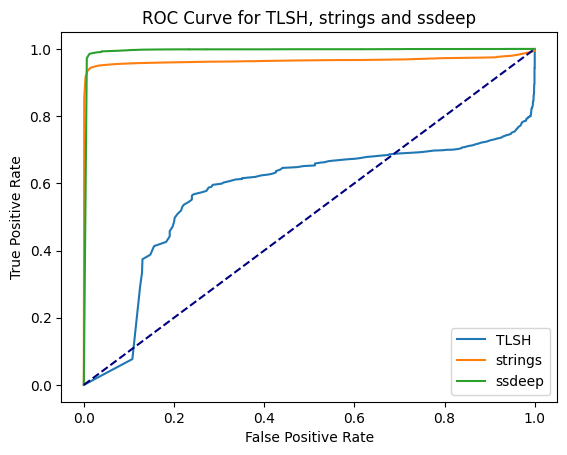

In [ ]:
# plot the roc curve of variable 'd', 't', 's'
plt.plot(p["false_positive_rate"], p["true_positive_rate"], label="TLSH")
plt.plot(s["false_positive_rate"], s["true_positive_rate"], label="strings")
plt.plot(d["false_positive_rate"], d["true_positive_rate"], label="ssdeep")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for TLSH, strings and ssdeep")
plt.show()

In [ ]:
# calculate the area under the curve for variable 'd', 't', 's'
from sklearn.metrics import auc
print(f"TLSH: {auc(p['false_positive_rate'], p['true_positive_rate'])}")
print(f"strings: {auc(s['false_positive_rate'], s['true_positive_rate'])}")
print(f"ssdeep: {auc(d['false_positive_rate'], d['true_positive_rate'])}")


TLSH: 0.5708982489587423
strings: 0.9652548458630723
ssdeep: 0.995039813291033


In [ ]:
print(f'The optimal Threshold is: {(p["true_positive_rate"] - p["false_positive_rate"]).abs().idxmax()}')

The optimal Threshold is: 20


In [ ]:
def ssdeep_f1(s):

    ssdeep_th = pd.DataFrame(columns=["threshold", "f1", "accuracy", "precision", "recall"])
    comp_to_sci = s[s["Scicore 1"] == False]
    compt_to_malware = s[s["Scicore 2"] == True]
    for i in range (-1,100,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] >= i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] > i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        precision = TP / (TP + FP) if TP + FP != 0 else 0
        recall = TP / (TP + FN) if TP + TN != 0 else 0
        
        f1 = (2 * precision * recall) / (precision + recall)
        accuracy = (TP + TN) / (TP + FP + FN + TN)
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, f1, accuracy, precision, recall]
    return ssdeep_th
p = ssdeep_f1(ssdeep_best)

<Axes: title={'center': 'F1 Score for ssdeep'}, xlabel='threshold'>

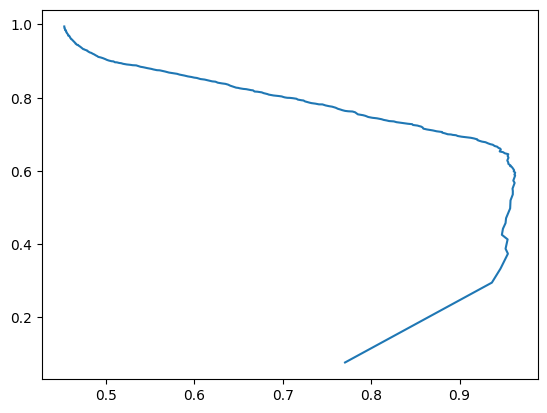

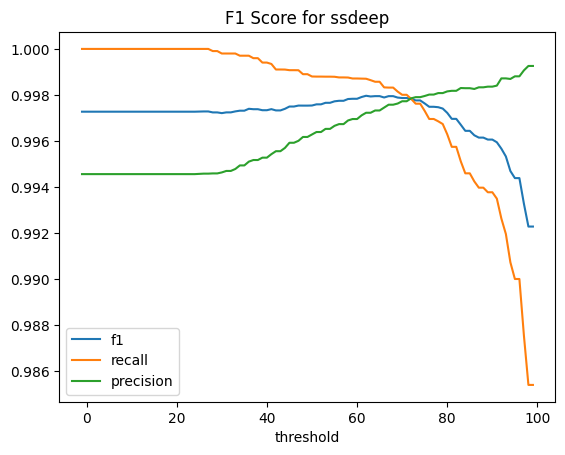

In [ ]:
# plot all the f1 curves
plt.plot( f1_tlsh["precision"], f1_tlsh["recall"], label="TLSH")
#plt.plot(f1_strings["precision"], f1_strings["recall"], label="strings")
p.plot(x="threshold", y=["f1","recall", "precision"],title="F1 Score for ssdeep")

<Axes: title={'center': 'F1 Score for strings'}, xlabel='threshold'>

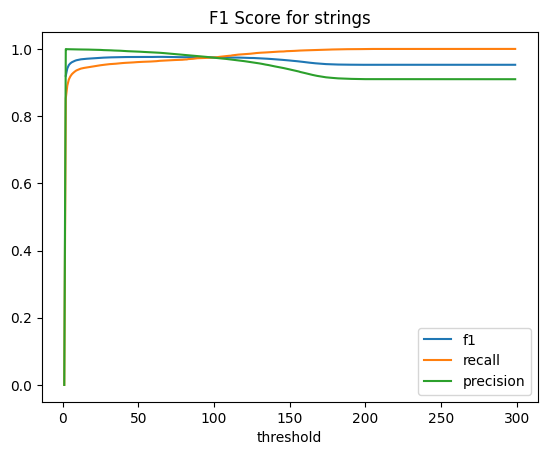

In [ ]:
f1_strings.plot(x="threshold", y=["f1","recall", "precision"],title="F1 Score for strings")

In [ ]:
tlsh_comp = tlsh_best

tlsh_comp_diff = tlsh_comp[tlsh_comp["Diff Score"] < 400]
tlsh_comp_diff = tlsh_comp_diff[tlsh_comp_diff["Scicore 1"] == False]


ssdeep_comp_diff = ssdeep_best[ssdeep_best["Diff Score"] > 0]

(ssdeep_comp_diff["Family 1"] == ssdeep_comp_diff["Family 2"]).sum() / len(ssdeep_comp_diff)

0.9875225614062623

In [ ]:
len(ssdeep_comp_diff) / len(ssdeep_best)

0.8048162116318097

In [ ]:
intersect = set(tlsh_comp_diff["Family 1"]) & set(ssdeep_comp_diff["Family 1"])
union = set(tlsh_comp_diff["Family 1"]) | set(ssdeep_comp_diff["Family 1"])
len(union - intersect) / len(union)


0.5769764216366158

In [ ]:
tlsh_comp = tlsh_best
#ssdeep_comp = results_ssdeep.loc[results_ssdeep.groupby('ssdeep 1')["Diff Score"].idxmax()]
strings_comp = strings_best
tls = []
ssd = []
strs = []
for i in range (0,300,10):
    tlsh_comp_diff = tlsh_comp[tlsh_comp["Diff Score"] < i]
    str_comp_diff = strings_comp[strings_comp["Diff Score"] < i]
    tlsh_comp_diff = tlsh_comp_diff[tlsh_comp_diff["Scicore 1"] == False]
    str_comp_diff = str_comp_diff[str_comp_diff["Scicore 1"] == False]
    winrate_tlsh = (tlsh_comp_diff["Family 1"] == tlsh_comp_diff["Family 2"]).sum() / len(tlsh_comp_diff)
    winrate_str = (str_comp_diff["Family 1"] == str_comp_diff["Family 2"]).sum() / len(str_comp_diff)
    total_tlsh = len(tlsh_comp_diff) / len(tlsh_comp)
    total_str = len(str_comp_diff) / len(strings_comp)
    tls.append((winrate_tlsh, 1-winrate_tlsh, total_tlsh,i))
    strs.append((winrate_str, 1-winrate_str, total_str,i))
for j in range (0,100,1):
    ssdeep_comp_diff = ssdeep_best[ssdeep_best["Diff Score"] >= j]
    ssdeep_comp_diff = ssdeep_comp_diff[ssdeep_comp_diff["Scicore 1"] == False]
    winrate = (ssdeep_comp_diff["Family 1"] == ssdeep_comp_diff["Family 2"]).sum() / len(ssdeep_comp_diff)
    total = len(ssdeep_comp_diff) / len(ssdeep_best)
    ssd.append((winrate, 1-winrate, total,j))

<Figure size 640x480 with 0 Axes>

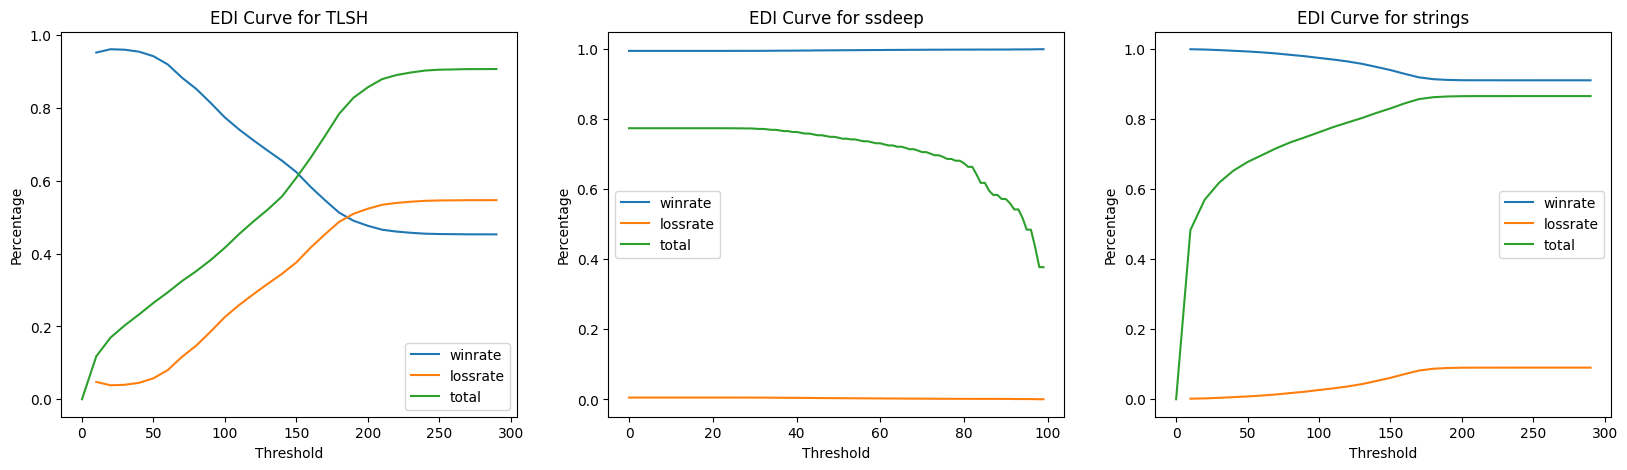

In [ ]:
titi = pd.DataFrame(tls, columns=["winrate", "lossrate", "total", "threshold"])
sisi = pd.DataFrame(ssd, columns=["winrate", "lossrate", "total", "threshold"])
stsr = pd.DataFrame(strs, columns=["winrate", "lossrate", "total", "threshold"])

plt.clf()
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].plot(titi["threshold"], titi["winrate"], label="winrate")
ax[0].plot(titi["threshold"], titi["lossrate"], label="lossrate")
ax[0].plot(titi["threshold"], titi["total"], label="total")
ax[0].legend()
ax[0].set_title("EDI Curve for TLSH")
ax[0].set_xlabel("Threshold")
ax[0].set_ylabel("Percentage")
ax[1].plot(sisi["threshold"], sisi["winrate"], label="winrate")
ax[1].plot(sisi["threshold"], sisi["lossrate"], label="lossrate")
ax[1].plot(sisi["threshold"], sisi["total"], label="total")
ax[1].legend()
ax[1].set_title("EDI Curve for ssdeep")
ax[1].set_xlabel("Threshold")
ax[1].set_ylabel("Percentage")
ax[2].plot(stsr["threshold"], stsr["winrate"], label="winrate")
ax[2].plot(stsr["threshold"], stsr["lossrate"], label="lossrate")
ax[2].plot(stsr["threshold"], stsr["total"], label="total")
ax[2].legend()
ax[2].set_title("EDI Curve for strings")
ax[2].set_xlabel("Threshold")
ax[2].set_ylabel("Percentage")
plt.show()

In [ ]:
a = df
a = a[a['tlsh'] != 'TNULL']
a.dropna(subset=['tlsh'], inplace=True)
a.dropna(subset=['ssdeep'], inplace=True)
a.dropna(subset=['strings'], inplace=True)
a['tlsh'] = a['tlsh'].apply(lambda x: x['hash_time'] if 'hash_time' in x and isinstance(x, dict) else x)
a = a[a['tlsh'] != 'TNULL']
a['ssdeep'] = a['ssdeep'].apply(lambda x: x['hash_time'] if 'hash_time' in x and isinstance(x, dict) else x)

a['strings'] = a['strings'].apply(lambda x: x['hash_time'] if 'hash_time' in x and isinstance(x, dict) else x)
a = a[a['strings'] != 'TNULL']
time_df = a

In [ ]:
time_df.sort_values(by='file_size', ascending=False)

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke
99581,65639e973624482ac9d31ce0,Vidar,f1e8f4fba1da25cc02d0673f8cc3962c7419d769cb139f...,761452376,4.002056,sdhash hash,3.060648,Machoc hash,1.314515,NaN
101823,6563a1f43624482ac9d325a2,WpBruteBot,37b086d348a2d02cd9d350c1511ee64df71f196ac732e8...,671976088,2.658913,sdhash hash,2.630134,Machoc hash,3.269084,NaN
1974,656379d13624482ac9d19f99,Bankshot,aa42069a01ee859c0ded7d6782a35d686f69530887b693...,660818559,2.606071,sdhash hash,2.614026,Machoc hash,8.189435,NaN
21621,656380193624482ac9d1ec58,Bazarbackdoor,4234abcbfb6d3db00523196def94143b8f5baa75026266...,653695192,2.652530,sdhash hash,2.676548,Machoc hash,4.167641,NaN
27359,656384b63624482ac9d202c2,Bazarbackdoor,f62d7b2ec86bf1417da84685ea27294efc56f60d072011...,645556253,2.699145,sdhash hash,2.529622,Machoc hash,3.273366,NaN
...,...,...,...,...,...,...,...,...,...,...
32059,6563872d3624482ac9d2151e,EvilPlayout,8b74c08c33cd8a0cc1eaf822caeaad6b54bc39e4839e57...,8,0.000007,sdhash hash,0.000002,Machoc hash,0.049660,NaN
103450,6563a2bb3624482ac9d32bfd,Zeus,b5bb9d8014a0f9b1d61e21e796d78dccdf1352f23cd328...,4,0.000085,sdhash hash,0.000014,Machoc hash,0.016268,NaN
20119,65637e853624482ac9d1e67a,Bazarbackdoor,13671077b66a29874a2578b5240319092ef2a1043228e4...,3,0.000167,sdhash hash,0.000021,Machoc hash,0.131402,NaN
23623,656381f73624482ac9d1f42a,Bazarbackdoor,8241649609f88ccd2a0a5b233a07a538ec313ff6adf695...,2,0.000094,sdhash hash,0.000020,Machoc hash,0.062852,NaN


In [ ]:
# map median time to family and percentage of hit rate
def time_median(df):
    tlsh_time = []
    ssdeep_time = []
    string_time = []
    for family in df['Family 1'].unique():

        values = time_df[time_df['family'] == family]['tlsh'].tolist()
        median = np.median(values) if values else np.nan
        amount = len(values)
        tmp = df[df['Family 1'] == family]
        percentage = (tmp["Family 1"] == tmp["Family 2"]).sum() / len(df) * 100
        tlsh_time.append({
            'family': family,
            'values': values,
            'median': median,
            'amount': amount,
            'percentage': percentage
        })
        
    return pd.DataFrame(tlsh_time)

tlsh_median = time_median(tlsh_best)

tlsh_median.dropna(subset=['median'], inplace=True)

In [ ]:
tlsh_median.sort_values(by='percentage', ascending=False)

# calculate the correlation coefficeint between median time and percentage
from scipy.stats import pearsonr
pearsonr(tlsh_median['median'], tlsh_median['percentage'])

PearsonRResult(statistic=-0.05502603280060918, pvalue=0.21030900594367732)

<Axes: ylabel='Frequency'>

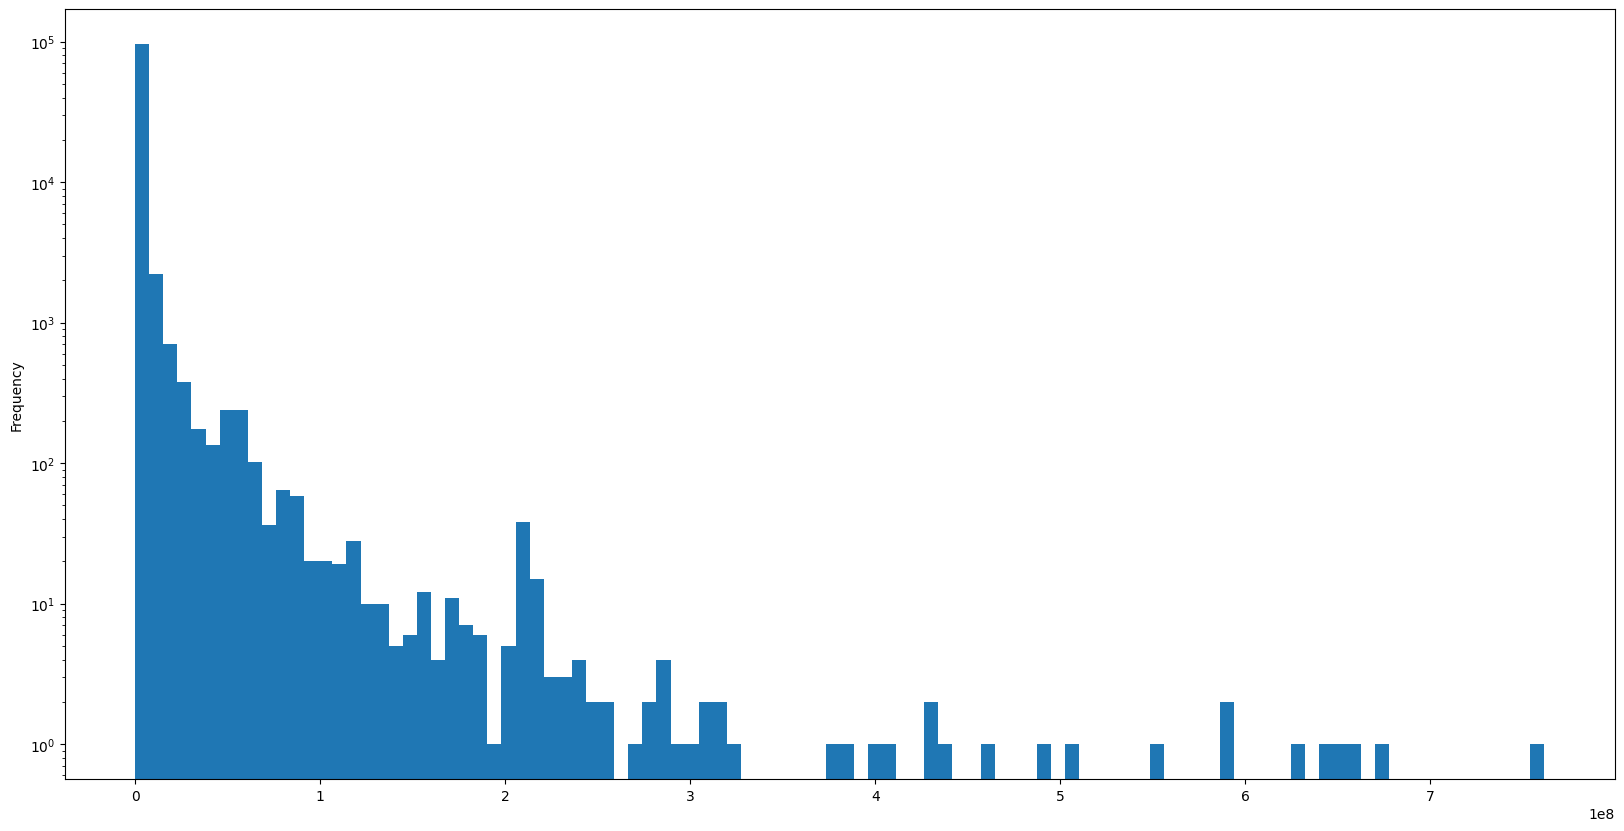

In [ ]:
time_df["file_size"].plot(kind='hist', bins=100, figsize=(20, 10),logy=True)